In [4]:
 !pip install nltk

Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 0.0/41.5 kB ? eta -:--:--
     ----------------------------- ---------- 30.7/41.5 kB ? eta -:--:--
     -------------------------------------  41.0/41.5 kB 653.6 kB/s eta 0:00:01
     -------------------------------------- 41.5/41.5 kB 333.1 kB/s eta 0:00:00
     ---------------------------------------- 0.0/57.7 kB ? eta -:--:--
     ----------------------------------- ---- 51.2/57.7 kB 1.3 MB/s eta 0:00:01
     ---------------------------------------- 57.7/57.7 kB 1.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   - -------------------------------------- 0.1/1.5 MB 1.6 MB/s eta 0:00:01
   --- ------------------------------------ 0.1/1.5 MB 1.8 MB/s eta 0:00:01
   ----- ---------------------------------- 0.2/1.5 MB 1.5 MB/s eta 0:00:01
   ------ --------------------------------- 0.3/1.5 MB 1.6 MB/s eta 0:00:01
   ---------


[notice] A new release of pip is available: 24.0 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
!pip install wordcloud


Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/301.2 kB ? eta -:--:--
   - -------------------------------------- 10.2/301.2 kB ? eta -:--:--
   - -------------------------------------- 10.2/301.2 kB ? eta -:--:--
   --- ----------------------------------- 30.7/301.2 kB 217.9 kB/s eta 0:00:02
   ------- ------------------------------- 61.4/301.2 kB 328.2 kB/s eta 0:00:01
   ----------- --------------------------- 92.2/301.2 kB 403.5 kB/s eta 0:00:01
   --------------- ---------------------- 122.9/301.2 kB 450.6 kB/s eta 0:00:01
   ------------------------- ------------ 204.8/301.2 kB 621.6 kB/s eta 0:00:01
   --------------------------------- ---- 266.2/301.2 kB 713.1 kB/s eta 0:00:01
   -------------------------------------  297.0/301.2 kB 733.3 kB/s eta 0:00:01
   -------------------------------------- 301.2/301.2 kB 716.6 kB/s eta 0:00:00



[notice] A new release of pip is available: 24.0 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [8]:
!pip install xgboost



[notice] A new release of pip is available: 24.0 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB 146.3 kB/s eta 0:14:14
   ---------------------------------------- 0.0/124.9 MB 151.3 kB/s eta 0:13:46
   ---------------------------------------- 0.1/124.9 MB 245.8 kB/s eta 0:08:28
   ---------------------------------------- 0.1/124.9 MB 364.4 kB/s eta 0:05:43
   ---------------------------------------- 0.2/124.9 MB 535.8 kB/s eta 0:03:53
   ---------------------------------------- 0.2/124.9 MB 600.7 kB/s eta 0:03:28
   ---------------------------------------- 0.3/124.9 MB 703.0 kB/s eta 0:02:58
   ----

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.stem.porter import PorterStemmer
nltk.download('stopwords')
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from wordcloud import WordCloud
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
import joblib
import string
import pickle
import re

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\SAM\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\SAM\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
data= pd.read_csv("C:/Users/SAM/Desktop/sentiment analysis/amazon_alexa.tsv",delimiter='\t')
data

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1
...,...,...,...,...,...
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1
3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1
3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1


# data cleaning

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            3150 non-null   int64 
 1   date              3150 non-null   object
 2   variation         3150 non-null   object
 3   verified_reviews  3149 non-null   object
 4   feedback          3150 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 123.2+ KB


In [4]:
data.isna().sum()

rating              0
date                0
variation           0
verified_reviews    1
feedback            0
dtype: int64

In [5]:
# finding the null value row
data[data['verified_reviews'].isna() == True]

,rating,date,variation,verified_reviews,feedback
473,2,29-Jun-18,White,NaN,0


In [6]:
# drop the entire row
data.dropna(inplace=True)

In [7]:
data.isna().sum()

rating              0
date                0
variation           0
verified_reviews    0
feedback            0
dtype: int64

# Exploratory Data Analysis

In [8]:
data['rating'].unique()

array([5, 4, 3, 2, 1])

In [9]:
data['rating'].count()

np.int64(3149)

In [10]:
data['rating'].value_counts()

rating
5    2286
4     455
1     161
3     152
2      95
Name: count, dtype: int64

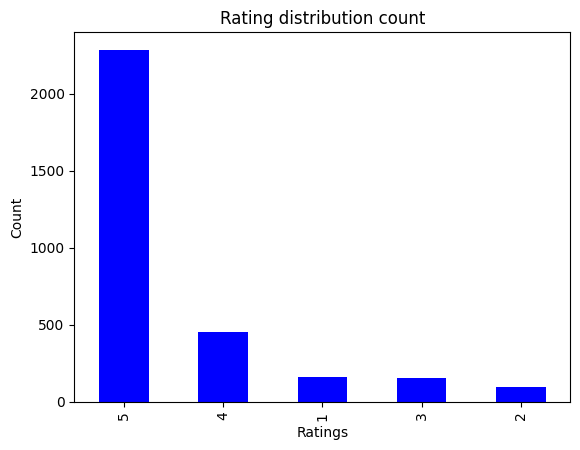

In [11]:
##Bar plot to visualize the total counts of each rating

data['rating'].value_counts().plot.bar(color = 'blue')
plt.title('Rating distribution count')
plt.xlabel('Ratings')
plt.ylabel('Count')
plt.show()

In [12]:
#Finding the percentage distribution of each rating - we'll divide the number of records for each rating by total number of records

print(f"Rating value count - percentage distribution: \n{round(data['rating'].value_counts()/data.shape[0]*100,2)}")

Rating value count - percentage distribution: 
rating
5    72.59
4    14.45
1     5.11
3     4.83
2     3.02
Name: count, dtype: float64


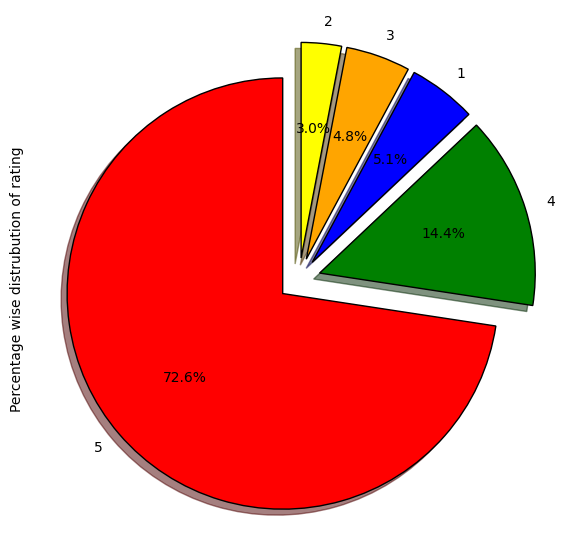

In [13]:
# plot the above values in a pie chart
fig = plt.figure(figsize=(7,7))

colors = ('red', 'green', 'blue','orange','yellow')

wp = {'linewidth':1, "edgecolor":'black'}

tags = data['rating'].value_counts()/data.shape[0]

explode=(0.1,0.1,0.1,0.1,0.1)

tags.plot(kind='pie', autopct="%1.1f%%", shadow=True, colors=colors, startangle=90, wedgeprops=wp, explode=explode, label='Percentage wise distrubution of rating')

from io import  BytesIO

graph = BytesIO()

fig.savefig(graph, format="png")

 70% of the data is 5 star rating and remaining 30% of the data is 4,3,2,1 star rating . so the data is imbalance 

# Analyzing 'feedback' column

This column refers to the feedback of the verified review

In [14]:
data['feedback'].value_counts()

feedback
1    2893
0     256
Name: count, dtype: int64

There are 2 distinct values of 'feedback' present - 0 and 1. Let's see what kind of review each value corresponds to.


In [15]:
#Extracting the 'verified_reviews' value for one record with feedback = 0

review_0 = data[data['feedback'] == 0].iloc[1]['verified_reviews']
print(review_0)

Sound is terrible if u want good music too get a bose


In [16]:
#Extracting the 'verified_reviews' value for one record with feedback = 1

review_0 = data[data['feedback'] == 1].iloc[1]['verified_reviews']
print(review_0)

Loved it!


From the above 2 examples we can see that feedback 0 is negative review and 1 is positive review

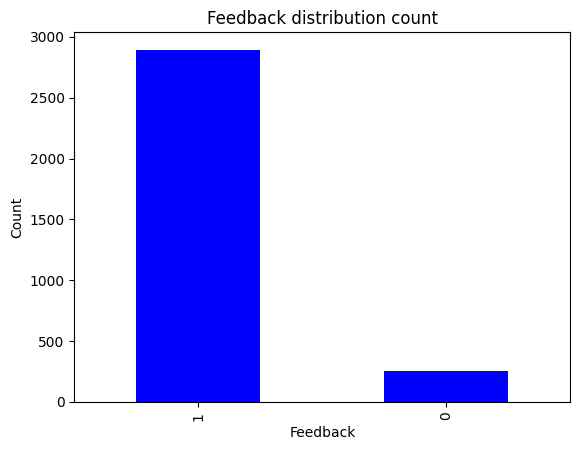

In [17]:
#Bar graph to visualize the total counts of each feedback

data['feedback'].value_counts().plot.bar(color = 'blue')
plt.title('Feedback distribution count')
plt.xlabel('Feedback')
plt.ylabel('Count')
plt.show()

In [18]:
#Finding the percentage distribution of each feedback - we'll divide the number of records for each feedback by total number of records

print(f"Feedback value count - percentage distribution: \n{round(data['feedback'].value_counts()/data.shape[0]*100,2)}")

Feedback value count - percentage distribution: 
feedback
1    91.87
0     8.13
Name: count, dtype: float64


from the above data 
- 92% of the data is positive feedback
- 8% of the data is negative feedback 

this indicates that data is imbalance 

<Axes: ylabel='Percentage wise distrubution of feedback'>

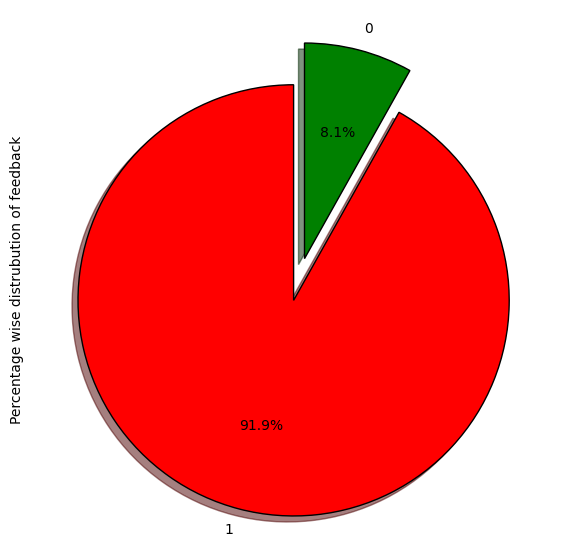

In [19]:
fig = plt.figure(figsize=(7,7))

colors = ('red', 'green')

wp = {'linewidth':1, "edgecolor":'black'}

tags = data['feedback'].value_counts()/data.shape[0]

explode=(0.1,0.1)

tags.plot(kind='pie', autopct="%1.1f%%", shadow=True, colors=colors, startangle=90, wedgeprops=wp, explode=explode, label='Percentage wise distrubution of feedback')

Let's see the 'rating' values for different values of 'feedback'

In [20]:
#Feedback = 0
data[data['feedback'] == 0]['rating'].value_counts()

rating
1    161
2     95
Name: count, dtype: int64

In [21]:
#Feedback = 1
data[data['feedback'] == 1]['rating'].value_counts()

rating
5    2286
4     455
3     152
Name: count, dtype: int64

If rating of a review is 1 or 2 then the feedback is 0 (negative) and if the rating is 3, 4 or 5 then the feedback is 1 (positive).

# Analyzing 'variation' column

This column refers to the variation or type of Amazon Alexa product. Example - Black Dot, Charcoal Fabric etc.

In [22]:
#Distinct values of 'variation' and its count 

print(f"Variation value count: \n{data['variation'].value_counts()}")

Variation value count: 
variation
Black  Dot                      516
Charcoal Fabric                 430
Configuration: Fire TV Stick    350
Black  Plus                     270
Black  Show                     265
Black                           261
Black  Spot                     241
White  Dot                      184
Heather Gray Fabric             157
White  Spot                     109
Sandstone Fabric                 90
White                            90
White  Show                      85
White  Plus                      78
Oak Finish                       14
Walnut Finish                     9
Name: count, dtype: int64


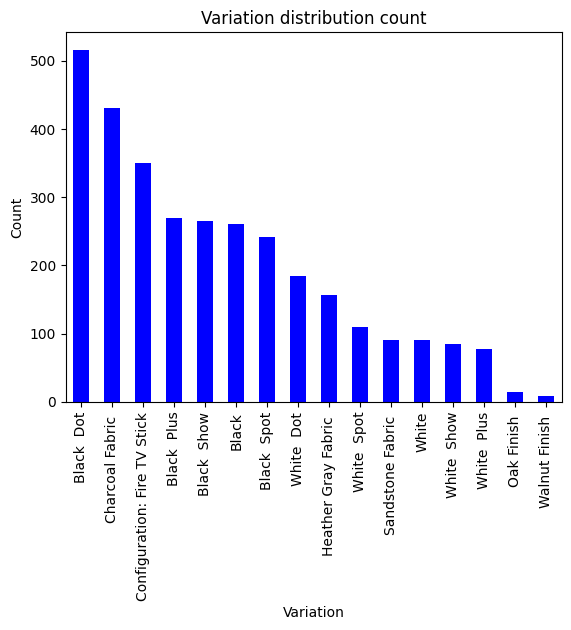

In [23]:
#Bar graph to visualize the total counts of each variation

data['variation'].value_counts().plot.bar(color = 'blue')
plt.title('Variation distribution count')
plt.xlabel('Variation')
plt.ylabel('Count')
plt.show()

In [24]:
data['variation'].value_counts()/data.shape[0]*100

variation
Black  Dot                      16.386154
Charcoal Fabric                 13.655129
Configuration: Fire TV Stick    11.114640
Black  Plus                      8.574151
Black  Show                      8.415370
Black                            8.288346
Black  Spot                      7.653223
White  Dot                       5.843125
Heather Gray Fabric              4.985710
White  Spot                      3.461416
Sandstone Fabric                 2.858050
White                            2.858050
White  Show                      2.699270
White  Plus                      2.476977
Oak Finish                       0.444586
Walnut Finish                    0.285805
Name: count, dtype: float64

In [25]:
data.groupby('variation')['rating'].mean()

variation
Black                           4.233716
Black  Dot                      4.453488
Black  Plus                     4.370370
Black  Show                     4.490566
Black  Spot                     4.311203
Charcoal Fabric                 4.730233
Configuration: Fire TV Stick    4.591429
Heather Gray Fabric             4.694268
Oak Finish                      4.857143
Sandstone Fabric                4.355556
Walnut Finish                   4.888889
White                           4.166667
White  Dot                      4.423913
White  Plus                     4.358974
White  Show                     4.282353
White  Spot                     4.311927
Name: rating, dtype: float64

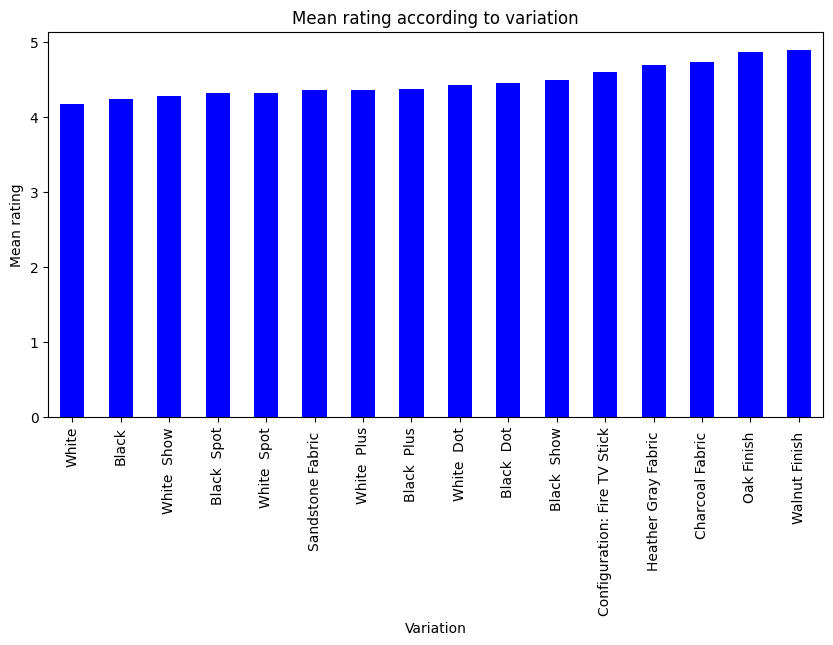

In [26]:
data.groupby('variation')['rating'].mean().sort_values().plot.bar(color = 'blue', figsize=(10, 5))
plt.title("Mean rating according to variation")
plt.xlabel('Variation')
plt.ylabel('Mean rating')
plt.show()

# feacher engineering

In [27]:
#Creating a new column 'length' that will contain the length of the string in 'verified_reviews' column

data['length'] = data['verified_reviews'].apply(len)
data

,rating,date,variation,verified_reviews,feedback,length
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,195
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,172
4,5,31-Jul-18,Charcoal Fabric,Music,1,5
...,...,...,...,...,...,...
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1,50
3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1,135
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1,441
3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1,380


The 'length' column is new generated column - stores the length of 'verified_reviews' for that record. Let's check for some sample records

In [28]:
#Randomly checking for 10th record

print(f"'verified_reviews' column value: {data.iloc[10]['verified_reviews']}") #Original value
print(f"Length of review : {len(data.iloc[10]['verified_reviews'])}") #Length of review using len()
print(f"'length' column value : {data.iloc[10]['length']}") #Value of the column 'length'

'verified_reviews' column value: I sent it to my 85 year old Dad, and he talks to it constantly.
Length of review : 63
'length' column value : 63


We can see that the length of review is the same as the value in the length column for that record

# Adding new colunm sentiment 

(By using rating column data we creating new column (sentiment))
- This column will be the target column 
- And to reduce data imbalance 
- 5,4 star rating will be positive 
- 3 star rating will be neutral 
- 2,1 star will be negative 

In [29]:

# Function to classify sentiment
def classify_sentiment(rating):
    if rating in [5, 4]:
        return 'Positive'
    elif rating == 3:
        return 'Neutral'
    else:  # rating 1 or 2
        return 'Negative'

# Create new 'sentiment' column
data['sentiment'] = data['rating'].apply(classify_sentiment)

# Display the DataFrame
data

,rating,date,variation,verified_reviews,feedback,length,sentiment
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13,Positive
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9,Positive
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,195,Positive
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,172,Positive
4,5,31-Jul-18,Charcoal Fabric,Music,1,5,Positive
...,...,...,...,...,...,...,...
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1,50,Positive
3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1,135,Positive
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1,441,Positive
3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1,380,Positive


In [30]:
data['sentiment'].value_counts()

sentiment
Positive    2741
Negative     256
Neutral      152
Name: count, dtype: int64

In [31]:
positive_rev = data[data['sentiment'] == 'Positive'][['verified_reviews']].head(5)
positive_rev

,verified_reviews
0,Love my Echo!
1,Loved it!
2,"Sometimes while playing a game, you can answer..."
3,I have had a lot of fun with this thing. My 4 ...
4,Music


In [32]:
neutral_rev = data[data['sentiment'] == 'Neutral'][['verified_reviews']].head(5)
neutral_rev

,verified_reviews
6,"Without having a cellphone, I cannot use many ..."
24,"I got a second unit for the bedroom, I was exp..."
33,The speakers sound pretty good for being so sm...
49,No different than Apple. To play a specific li...
54,like google better


In [33]:
negative_rev = data[data['sentiment'] == 'Negative'][['verified_reviews']].head(5)
negative_rev

,verified_reviews
46,"It's like Siri, in fact, Siri answers more acc..."
111,Sound is terrible if u want good music too get...
141,Not much features.
162,"Stopped working after 2 weeks ,didn't follow c..."
176,Sad joke. Worthless.


In [34]:
# Combine all reviews for each feedback category and splitting them into individual words
neg_reviews = " ".join([review for review in data[data['sentiment'] == 'Negative']['verified_reviews']])
neg_reviews = neg_reviews.lower().split()

neu_reviews = " ".join([review for review in data[data['sentiment'] == 'Neutral']['verified_reviews']])
neu_reviews = neu_reviews.lower().split()


pos_reviews = " ".join([review for review in data[data['sentiment'] == 'Positive']['verified_reviews']])
pos_reviews = pos_reviews.lower().split()

#Finding words from reviews which are present in that feedback category only
unique_negative = [x for x in neg_reviews if x not in pos_reviews]
unique_negative = " ".join(unique_negative)

unique_neutral = [x for x in neg_reviews if x not in neu_reviews]
unique_neutral = " ".join(unique_neutral)

unique_positive = [x for x in pos_reviews if x not in neg_reviews]
unique_positive = " ".join(unique_positive)

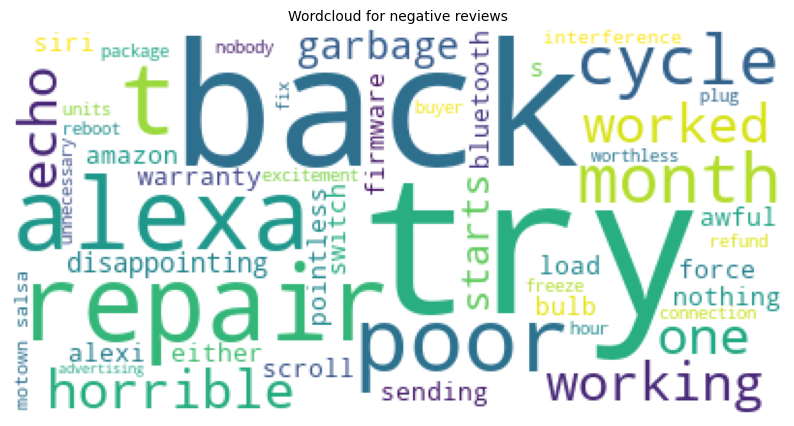

In [36]:
wc = WordCloud(background_color='white', max_words=50)

# Generate and plot wordcloud
plt.figure(figsize=(10,10))
plt.imshow(wc.generate(unique_negative))
plt.title('Wordcloud for negative reviews', fontsize=10)
plt.axis('off')
plt.show()

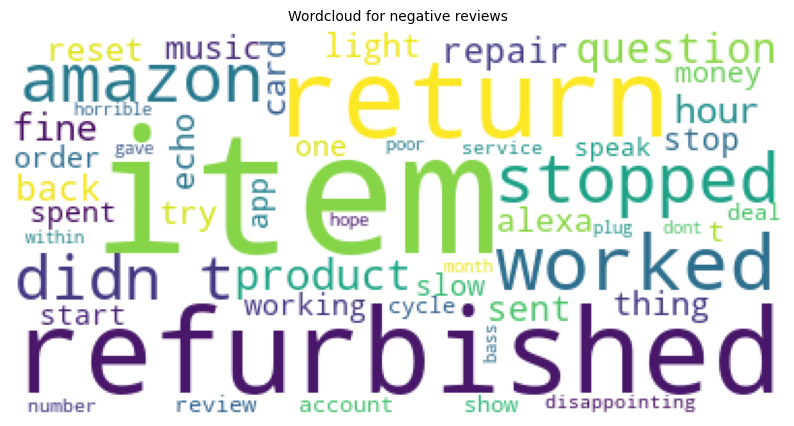

In [37]:
wc = WordCloud(background_color='white', max_words=50)

# Generate and plot wordcloud
plt.figure(figsize=(10,10))
plt.imshow(wc.generate(unique_neutral))
plt.title('Wordcloud for negative reviews', fontsize=10)
plt.axis('off')
plt.show()

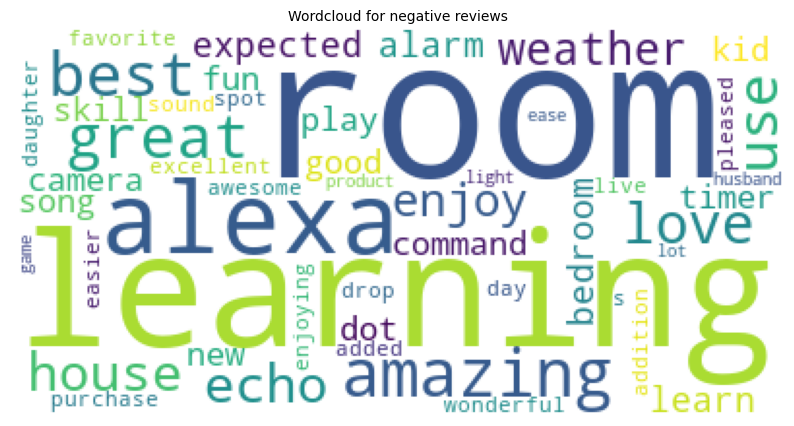

In [38]:
wc = WordCloud(background_color='white', max_words=50)

# Generate and plot wordcloud
plt.figure(figsize=(10,10))
plt.imshow(wc.generate(unique_positive))
plt.title('Wordcloud for negative reviews', fontsize=10)
plt.axis('off')
plt.show()

### Preprocessing and Modelling
 To build the corpus from the 'verified_reviews' we perform the following -

-      Replace any non alphabet characters with a space
-      Covert to lower case and split into words
-      Iterate over the individual words and if it is not a stopword then add the stemmed form of the word to the corpus

# Data Preprocessing

In [39]:
corpus = []
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))  # You can also use your custom STOPWORDS set

for i in range(0, data.shape[0]):
    review = data.iloc[i]['verified_reviews']
    # Remove punctuation
    review = review.translate(str.maketrans('', '', string.punctuation))
    # Remove non-alphabetic characters (optional cleanup)
    review = re.sub('[^a-zA-Z ]', ' ', review)
    # Convert to lowercase and tokenize
    review = review.lower().split()
    # Remove stopwords and apply lemmatization
    review = [lemmatizer.lemmatize(word) for word in review if word not in stop_words]
    # Rejoin into a cleaned sentence
    review = ' '.join(review)
    corpus.append(review)

In [40]:
from sklearn.feature_extraction.text import TfidfVectorizer

# TF-IDF Vectorization
tfidf = TfidfVectorizer(max_features=5000)  # You can change max_features as needed
X = tfidf.fit_transform(corpus).toarray()

# X is now the TF-IDF matrix you can use for modeling
print(X.shape)

(3149, 3821)


In [41]:
# Add the cleaned text (corpus) to a new column in your original DataFrame
data['cleaned_review'] = corpus

# Check the result
print(data[['verified_reviews', 'cleaned_review']].head())

                                    verified_reviews  \
0                                      Love my Echo!   
1                                          Loved it!   
2  Sometimes while playing a game, you can answer...   
3  I have had a lot of fun with this thing. My 4 ...   
4                                              Music   

                                      cleaned_review  
0                                          love echo  
1                                              loved  
2  sometimes playing game answer question correct...  
3  lot fun thing yr old learns dinosaur control l...  
4                                              music  


In [45]:
from sklearn.preprocessing import LabelEncoder


# If your sentiment data is a Series, convert to DataFrame (optional)
# sentiment_series = pd.Series([...])  # Example
# sentiment_df = sentiment_series.to_frame(name='sentiment')

# Assuming your DataFrame is named `data` and it has a 'sentiment' column
le = LabelEncoder()

# Fit and transform the 'sentiment' column
data['sentiment_encoded'] = le.fit_transform(data['sentiment'])

# To view the label mapping
label_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Label Mapping:", label_mapping)

# To display the encoded values side-by-side
print(data[['sentiment', 'sentiment_encoded']].drop_duplicates())


Label Mapping: {'Negative': np.int64(0), 'Neutral': np.int64(1), 'Positive': np.int64(2)}
   sentiment  sentiment_encoded
0   Positive                  2
6    Neutral                  1
46  Negative                  0


# Logistic Regression

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score


# Step 1: Define X and y
X = data['cleaned_review']
y = data['sentiment_encoded']

# Step 2: TF-IDF Vectorization
tfidf = TfidfVectorizer(max_features=5000)
X_tfidf = tfidf.fit_transform(X)

# Step 3: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42, stratify=y)

# Step 4: Train a classifier (Logistic Regression)
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Step 5: Predict and evaluate
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')  # For multiclass

# Step 6: Output results
print("Accuracy:", round(accuracy, 4))
print("F1 Score:", round(f1, 4))


Accuracy: 0.8746
F1 Score: 0.821


# Decision Tree

In [52]:
from sklearn.tree import DecisionTreeClassifier

# Model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Predictions
y_pred_dt = dt_model.predict(X_test)

# Evaluation
accuracy_dt = accuracy_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt, average='weighted')

print("\n🔹 Decision Tree")
print("Accuracy:", round(accuracy_dt, 4))
print("F1 Score:", round(f1_dt, 4))



🔹 Decision Tree
Accuracy: 0.8762
F1 Score: 0.8736


# SVM Classifier

In [53]:
from sklearn.svm import SVC

# Model
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

# Predictions
y_pred_svm = svm_model.predict(X_test)

# Evaluation
accuracy_svm = accuracy_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm, average='weighted')

print("\n🔹 SVM")
print("Accuracy:", round(accuracy_svm, 4))
print("F1 Score:", round(f1_svm, 4))



🔹 SVM
Accuracy: 0.8889
F1 Score: 0.851


# Model Saved in Pickel

In [54]:
import pickle

# Save the SVM model
with open('svm_model.pkl', 'wb') as file:
    pickle.dump(svm_model, file)

# Save the TF-IDF vectorizer as well (optional but necessary for predictions)
with open('tfidf_vectorizer.pkl', 'wb') as file:
    pickle.dump(tfidf, file)


In [55]:
# Load the SVM model
with open('svm_model.pkl', 'rb') as file:
    loaded_svm_model = pickle.load(file)

# Load the TF-IDF vectorizer
with open('tfidf_vectorizer.pkl', 'rb') as file:
    loaded_tfidf = pickle.load(file)
